<a href="https://colab.research.google.com/github/SelamZem/Pytorch_exercise/blob/main/BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch.nn as nn

In [2]:
df = pd.read_csv("/content/BostonHousing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.isnull().sum()/len(df)

,0
crim,0.000000
zn,0.000000
indus,0.000000
chas,0.000000
nox,0.000000
rm,0.009881
age,0.000000
dis,0.000000
rad,0.000000
tax,0.000000


In [7]:
df.rm.isnull().sum()

5

In [8]:
# fill the null values of rm with mean value
df.rm.fillna(df.rm.mean(),inplace=True)

<ipython-input-8-30bc1b983793>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.rm.fillna(df.rm.mean(),inplace=True)


In [9]:
# Check for duplicates
df.duplicated().sum()

0

In [10]:
# Check for correlation
correlation = df.corr()
correlation

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219261,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.310847,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.392052,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091434,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302051,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219261,0.310847,-0.392052,0.091434,-0.302051,1.000000,-0.239632,0.202268,-0.210353,-0.292178,-0.356065,0.127998,-0.614526,0.695375
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.239632,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.202268,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.210353,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292178,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

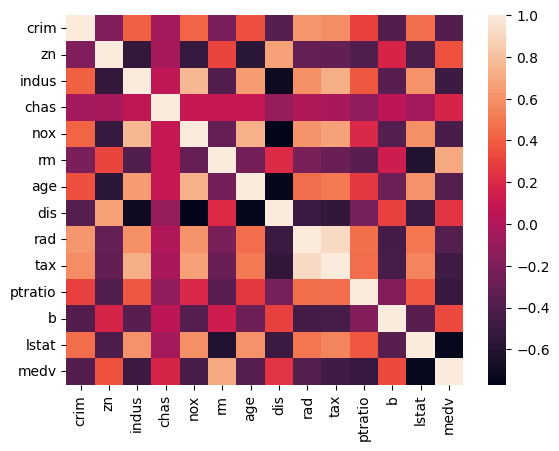

In [11]:
sns.heatmap(correlation)

In [12]:
# Checking the correlation of rad and tax
df[['rad', 'tax']].corr()

,rad,tax
rad,1.000000,0.910228
tax,0.910228,1.000000


In [13]:
# rad and tax seems to have high correlation,
df.drop('rad',axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   tax      506 non-null    int64  
 9   ptratio  506 non-null    float64
 10  b        506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


In [15]:
# Vertical split
X = df.drop('medv',axis=1)
y = df['medv']

In [16]:
 # Horizontal split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
# Build Model

class LinearModel(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = torch.nn.Linear(in_features=12, out_features=1)


  # Forward
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer(x)

In [19]:
#  Instantiate the model
model_0 = LinearModel()
model_1 = LinearModel() # to check with adam optimizer

In [20]:
model_0.state_dict()

OrderedDict([('layer.weight',
              tensor([[-0.0209, -0.2863, -0.2844, -0.1327,  0.0573,  0.0354, -0.2838, -0.1339,
                        0.0215, -0.2076, -0.1897,  0.0553]])),
             ('layer.bias', tensor([-0.1833]))])

In [21]:
# Create loss function and optimizer
Loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)
optimizer_1 = torch.optim.Adam(params=model_1.parameters(), lr=0.01)

In [22]:
torch.manual_seed(42)

epochs = 3000

for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(torch.tensor(X_train, dtype=torch.float32))
  loss = Loss_fn(y_pred, (torch.tensor(y_train.values, dtype=torch.float32)).unsqueeze(dim=1))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  if epoch % 10 == 0:
    model_0.eval()
    with torch.inference_mode():
      test_pred = model_0(torch.tensor(X_test, dtype=torch.float32))
      test_loss = Loss_fn(test_pred,(torch.tensor(y_test.values, dtype=torch.float32)).unsqueeze(dim=1))
      print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 22.979860305786133
Epoch: 10 | Loss: 22.879863739013672
Epoch: 20 | Loss: 22.779863357543945
Epoch: 30 | Loss: 22.679861068725586
Epoch: 40 | Loss: 22.57986068725586
Epoch: 50 | Loss: 22.479860305786133
Epoch: 60 | Loss: 22.379863739013672
Epoch: 70 | Loss: 22.279863357543945
Epoch: 80 | Loss: 22.179861068725586
Epoch: 90 | Loss: 22.07986068725586
Epoch: 100 | Loss: 21.9798641204834
Epoch: 110 | Loss: 21.879863739013672
Epoch: 120 | Loss: 21.779863357543945
Epoch: 130 | Loss: 21.679861068725586
Epoch: 140 | Loss: 21.57986068725586
Epoch: 150 | Loss: 21.4798641204834
Epoch: 160 | Loss: 21.379863739013672
Epoch: 170 | Loss: 21.279863357543945
Epoch: 180 | Loss: 21.179861068725586
Epoch: 190 | Loss: 21.079862594604492
Epoch: 200 | Loss: 20.9798641204834
Epoch: 210 | Loss: 20.879863739013672
Epoch: 220 | Loss: 20.779863357543945
Epoch: 230 | Loss: 20.679861068725586
Epoch: 240 | Loss: 20.579862594604492
Epoch: 250 | Loss: 20.4798641204834
Epoch: 260 | Loss: 20.379863739013

In [26]:
model_0.eval()
with torch.no_grad():
    predictions = model_0(torch.tensor(X_test, dtype=torch.float32))
    test_loss = Loss_fn(predictions, (torch.tensor(y_test, dtype=torch.float)).unsqueeze(dim=1))
    print(f'Test Loss: {test_loss.item():.4f}')


Test Loss: 3.1520


In [24]:
torch.manual_seed(42)

epochs = 2000

for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(torch.tensor(X_train, dtype=torch.float32))
  loss = Loss_fn(y_pred, (torch.tensor(y_train.values, dtype=torch.float32)).unsqueeze(dim=1))
  optimizer_1.zero_grad()
  loss.backward()
  optimizer_1.step()


  if epoch % 10 == 0:
    model_1.eval()
    with torch.inference_mode():
      test_pred = model_1(torch.tensor(X_test, dtype=torch.float32))
      test_loss = Loss_fn(test_pred,(torch.tensor(y_test.values, dtype=torch.float32)).unsqueeze(dim=1))
      print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 22.57855224609375
Epoch: 10 | Loss: 22.478551864624023
Epoch: 20 | Loss: 22.37855339050293
Epoch: 30 | Loss: 22.278554916381836
Epoch: 40 | Loss: 22.17855453491211
Epoch: 50 | Loss: 22.078556060791016
Epoch: 60 | Loss: 21.978553771972656
Epoch: 70 | Loss: 21.87855339050293
Epoch: 80 | Loss: 21.77855682373047
Epoch: 90 | Loss: 21.67855453491211
Epoch: 100 | Loss: 21.57855224609375
Epoch: 110 | Loss: 21.478553771972656
Epoch: 120 | Loss: 21.37855339050293
Epoch: 130 | Loss: 21.278554916381836
Epoch: 140 | Loss: 21.17855453491211
Epoch: 150 | Loss: 21.078556060791016
Epoch: 160 | Loss: 20.978553771972656
Epoch: 170 | Loss: 20.878555297851562
Epoch: 180 | Loss: 20.77855682373047
Epoch: 190 | Loss: 20.678556442260742
Epoch: 200 | Loss: 20.578556060791016
Epoch: 210 | Loss: 20.478553771972656
Epoch: 220 | Loss: 20.378555297851562
Epoch: 230 | Loss: 20.27855682373047
Epoch: 240 | Loss: 20.178556442260742
Epoch: 250 | Loss: 20.07855796813965
Epoch: 260 | Loss: 19.9785575866699

In [28]:
model_1.eval()
with torch.no_grad():
    predictions = model_1(torch.tensor(X_test, dtype=torch.float32))
    test_loss = Loss_fn(predictions, (torch.tensor(y_test, dtype=torch.float)).unsqueeze(dim=1))
    print(f'Test Loss: {test_loss.item():.4f}')


Test Loss: 3.8297
